# lesson2. 单变量线性回归案例
#### 使用学习次数数据预测学习时长

- [单变量线性回归](#单变量线性回归)
- [梯度下降](#梯度下降)

## 1.导入包

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d


## 2 读取数据

In [5]:
data = np.loadtxt('linear_regression_data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]),data[:,0]]
Y = np.c_[data[:,1]]
print('shape[0]',data.shape[0])
X.shape

shape[0] 97


(97, 2)

#### 大概看下数据的样子

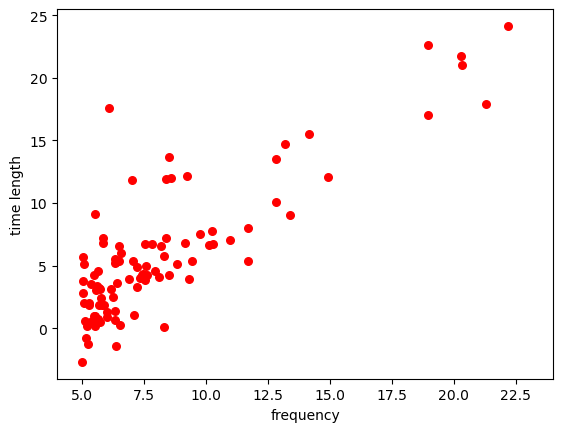

In [8]:
plt.scatter(X[:,1],Y, s=30, c='r', marker='o', linewidths=1)
plt.xlim(4,24)
plt.xlabel('frequency')
plt.ylabel('time length');

### 3.定义损失函数
- 学习时长和次数之间基本上符合线性关系，定义一个带截距的线性回归方程
![jupyter](linear_function1.png)
![jupyter](linear_regression_cosfunction1.png)

In [11]:
# 计算损失函数
def computeCost(x, y, theta=[[0],[0]]):
    #print('X.shape',x.shape)
     
    m = y.size
    #print('m',m)
    J = 0
    h = x.dot(theta)
    #print('h.shape',h.shape)
    
    J = 1.0/(2*m)*(np.sum(np.square(h-y)))#损失函数计算公式
    print(J)
    return J

In [13]:
computeCost(X,Y) #训练一次得到的损失函数值

32.072733877455676


32.072733877455676

## 4.定义梯度下降函数
![jupyter](linear_regression_gradient1.png)
![jupyter](linear_regression_gradient2.png)

In [16]:
# 梯度下降，训练1500次
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)#epoch=1500次
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1.0/m)*(X.T.dot(h-y))#定义梯度下降公式
        J_history[iter] = computeCost(X, y, theta)#
    return(theta, J_history)

## 5.使用数据计算梯度

6.737190464870003
5.9315935686049555
5.901154707081388
5.895228586444221
5.8900949431173295
5.885004158443647
5.879932480491418
5.874879094762575
5.869843911806385
5.86482686531293
5.8598278899321805
5.85484692057229
5.849883892376587
5.844938740722034
5.840011401218361
5.835101809707226
5.830209902261388
5.825335615183863
5.820478885007099
5.815639648492154
5.810817842627869
5.806013404630044
5.801226271940628
5.7964563822269
5.7917036733806535
5.7869680835173956
5.782249550975539
5.777548014315596
5.7728634123193805
5.768195683989213
5.76354476854712
5.758910605434047
5.754293134309077
5.749692295048628
5.745108027745684
5.740540272709012
5.735988970462381
5.731454061743792
5.726935487504702
5.722433188909257
5.717947107333528
5.713477184364749
5.709023361800549
5.704585581648198
5.7001637861238565
5.695757917651815
5.691367918863752
5.68699373259798
5.682635301898707
5.678292570015292
5.673965480401506
5.6696539767147955
5.6653580028155535
5.6610775027663784
5.656812420831359
5.6525

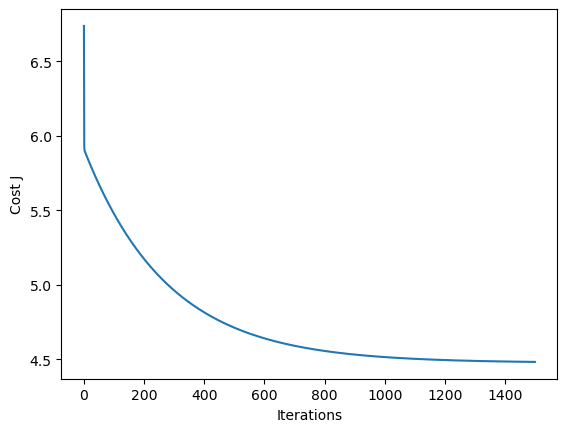

theta[1] [1.16636235]
theta[0] [-3.63029144]


In [19]:
# 画出每一次迭代和损失函数变化
theta , Cost_J = gradientDescent(X, Y)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');
plt.show()
print('theta[1]',theta[1])
print('theta[0]',theta[0])

### 6.画出拟合的直线

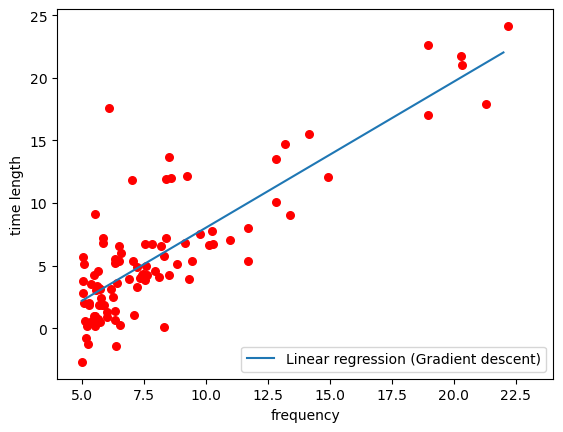

In [22]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx#确定好θ1和θ0后，得到回归公式


# 画出线性回归梯度下降收敛的情况
plt.scatter(X[:,1], Y, s=30, c='r', marker='o', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

plt.xlim(4,24)
plt.xlabel('frequency')
plt.ylabel('time length')
plt.legend(loc=4);

## 7. 输入新变量进行预测

In [25]:
# 预测一下学习次数为35次和70次的结果
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[4519.7678677]
[45342.45012945]


# sklearn实现linear regression

## 1. 导入包

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## 2.读取数据

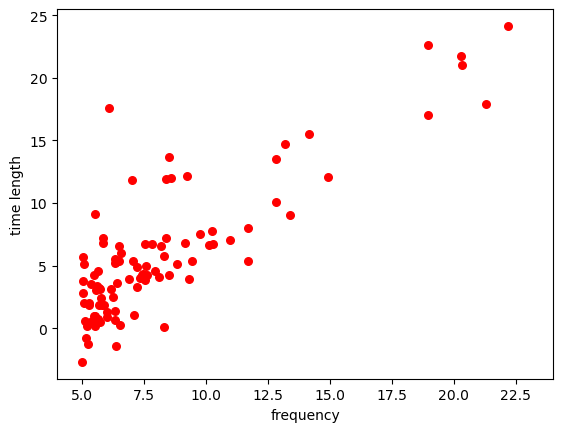

In [32]:
data = pd.read_csv('linear_regression_data1.csv')

population = data.iloc[:,0:1]
price = data.iloc[:,-1]

plt.scatter(population, price, s=30, c='r', marker='o', linewidths=1)
plt.xlim(4,24)
plt.xlabel('frequency')
plt.ylabel('time length');
plt.show()

## 3.构建模型

In [35]:
# 和Scikit-learn中的线性回归对比一下
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

## 4.输入数据进行计算

In [38]:
regr.fit(population, price)

theta1 = regr.coef_
theta0 = regr.intercept_
print('theta1',theta1)
print('theta0',theta0)

theta1 [1.19303364]
theta0 -3.895780878311852


## 5.画出结果

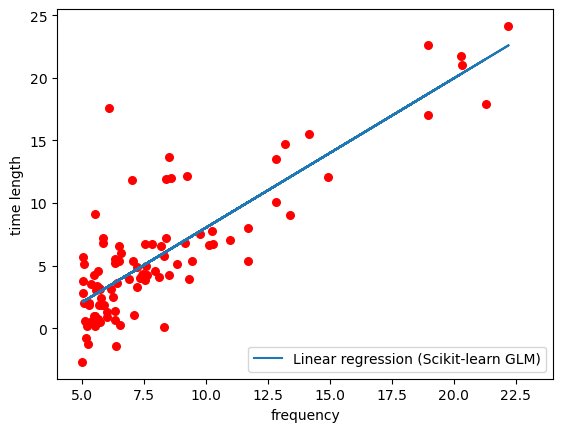

In [41]:

plt.scatter(population, price, s=30, c='r', marker='o', linewidths=1)


plt.plot(population, regr.intercept_+regr.coef_*population, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('frequency')
plt.ylabel('time length');
plt.legend(loc=4)
plt.show()